# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd

In [4]:
# Your work here.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate
sns.set_style('white')
sns.set_style('ticks')
sns.despine()
%matplotlib inline
df = pd.read_csv('data/human_body_temperature.csv')

In [6]:
df.head()
df.tail()

,temperature,gender,heart_rate
125,96.3,M,70.0
126,97.7,M,77.0
127,98.2,F,73.0
128,97.9,M,72.0
129,98.7,F,59.0


**1. Is the distribution of body temperatures normal?**

   **ANSWER:** According to the graph below, the distribution seems fairly normal.

D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


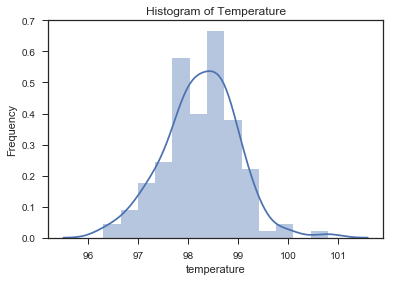

In [7]:
plt.title("Histogram of Temperature")
plt.ylabel('Frequency')
plt.xlabel('Temperature')
sns.distplot(df.temperature)

**2. Is the sample size large? Are the observations independent? **

   **ANSWER:** The amount of observations is 130. Although not large, it is greater than 30 observations which makes it sufficiently large for our purpose of hypothesis testing. The scatter plot for Observation Index vs Temperature and Observation Index vs Heart Rate seems to have no pattern and is random. Therefore, the observations are independent. The correlation between temperature and heart rate is positive but not large enough for there to be a problem with multicollinearity. Therefore, the variables are independent from each other.
    

In [8]:
len(df)

130

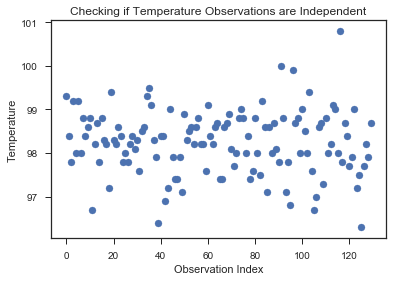

In [9]:
plt.scatter(df.index, df.temperature)
plt.xlabel('Observation Index')
plt.ylabel('Temperature')
plt.title('Checking if Temperature Observations are Independent')

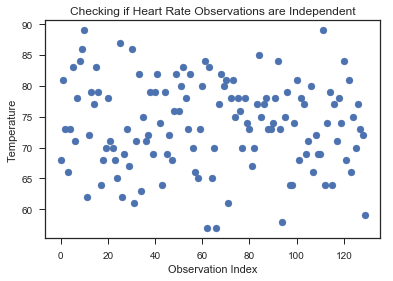

In [10]:
plt.scatter(df.index, df.heart_rate)
plt.xlabel('Observation Index')
plt.ylabel('Temperature')
plt.title('Checking if Heart Rate Observations are Independent')

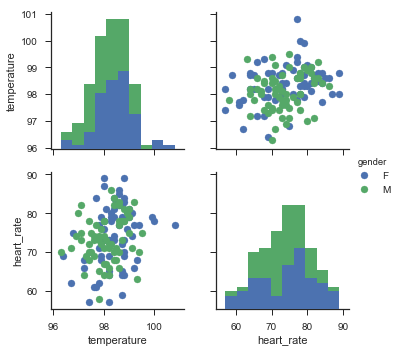

In [11]:
g = sns.PairGrid(df, hue='gender')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

In [12]:
df.corr()

,temperature,heart_rate
temperature,1.000000,0.253656
heart_rate,0.253656,1.000000


**3. Is the true population mean really 98.6 degrees F?**


**ANSWER:**

    h0: population mean == 98.6
    h1: population mean != 98.6  
Since the p-value is 0.00000024 and is less than even a critical value of 0.05, we can reject the null hypothesis in favor of the alternative hypothesis. Therefore, we can say with 95% confidence that the population mean is not 98.6 degrees F.
    

* **Would you use a one-sample or two-sample test? Why?**
    
**ANSWER:** I would use a one-sample test. A two sample test would require two different populations to be compared. Since we are only comparing if a single populations is different than a given value, we only need to use a one-sample test.
    
* **In this situation, is it appropriate to use the  *t*  or  *z*  statistic?**

**ANSWER:** Since we are not given the population Standard Deviation it is best to use the Student's t-test. 

* **Now try using the other test. How is the result be different? Why?**

**ANSWER:** The results from the *z* test is exactly the same as in the *t* test. This is because for sample sizes greater than 30, you get the same result. Also, since we don't know the population standard deviation I used the sample standard deviation to estimate the *z* test statistic. The formula to compute the z-score and t-score are exactly the same with the exception of the z-score using the population statistic and t-score using the sample statistic. Since I used the sample statistic, this give me the same result as the t-test.

In [13]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [14]:
xbar = df.temperature.mean()
sd = df.temperature.std()    

z = (xbar - 98.6)/(sd/len(df)**(1/2))
p = 1-stats.norm.cdf(abs(z))
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

 z-stat = -5.454823292364079 
 p-value = 2.451078506826576e-08


**4. At what temperature should we consider someone's temperature to be "abnormal"?**
* Start by computing the margin of error and confidence interval.

**Answer:** With 95% confidence, we expect that the temperature would like between 98.12 degrees and 98.38 degrees farenheit. Anything above or below that interval will be considered abnormal

In [15]:
se = sd/(len(df)**(1/2))
me = 1.96*se
plus = xbar + 1.96*se
minus = xbar - 1.96*se 
print (' 95% Confidence Interval: {minus} to {plus} \n Margin of Error: {me}'.format(minus=minus,plus=plus, me=me))

 95% Confidence Interval: 98.12319411222852 to 98.37526742623304 
 Margin of Error: 0.12603665700226638


**5. Is there a significant difference between males and females in normal temperature?**

**ANSWER:**

    h0: male temp mean - female temp mean == 0
    h1: male temp mean - female temp mean != 0  
   
Since the pvalue = 0.024 and is less than the critical value of 0.05, we can reject the null hypothesis in favor of the alternative hypothesis. Therefore, there is a significant difference between the normal body temperature of males and females.
* **What test did you use and why?**

**Answer:**
Since we are comparing two distinct groups, I use a 2 sample t-test. This is because we assume that these two groups are independent of each other. This would be different than a paired t-test. A paired t-test is similar to a one sample t-test but it compares pre-treatment and post-treatment of a single group. This means that the post-treatment sample is dependent on the pre-treatment sample.  This is why a 2 sample t-test is necessary because it has two independent groups.
* **Write a story with your conclusion in the context of the original problem.**


**ANSWER:**

The mean normal body temperature was held to be 37 ∘∘ C or 98.6 ∘∘ F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct? From a sample of 130 people, I found that the normal body temperature is actually different than 98.6 degrees Farenheit and with 95% confidence I expect the temperature to lie between 98.12 degrees and 98.38 degrees farenheit. This could be due to the fact that males and females actually have a statistically significant difference in their body temperature.

In [34]:
female = df.temperature[df.gender == 'F']
male = df.temperature[df.gender == 'M']
stats.ttest_ind(female,male)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)